In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape

(1460, 81)

In [4]:
test.shape

(1459, 80)

In [5]:
train.drop(train[(train["GrLivArea"]>4000)&(train["SalePrice"]<300000)].index,inplace=True)

In [6]:
SalePrice = train[['Id','SalePrice']]

In [7]:
train = train.drop('SalePrice',axis = 1)
train.drop('Id',axis = 1, inplace = True)
test_Id = test['Id']
test.drop('Id',axis = 1, inplace = True)

In [8]:
all_data = pd.concat((train,test)).reset_index(drop = True)

In [9]:
all_data.shape

(2917, 79)

In [10]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


# Missing Data Cleaning 
### Filled missing value with potential value like 'NA' or mean value

In [11]:
all_data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu'],axis = 1,inplace = True)

In [12]:
all_data_missing_ratio = all_data.isnull().sum()/ all_data.count() * 100
all_data_missing_ratio = all_data_missing_ratio.sort_values(ascending = False)
all_data_missing_ratio

LotFrontage      19.991773
GarageCond        5.765047
GarageQual        5.765047
GarageYrBlt       5.765047
GarageFinish      5.765047
GarageType        5.688406
BsmtCond          2.892416
BsmtExposure      2.892416
BsmtQual          2.856135
BsmtFinType2      2.819880
BsmtFinType1      2.783650
MasVnrType        0.829589
MasVnrArea        0.794748
MSZoning          0.137315
BsmtHalfBath      0.068611
Utilities         0.068611
Functional        0.068611
BsmtFullBath      0.068611
BsmtUnfSF         0.034294
SaleType          0.034294
BsmtFinSF2        0.034294
BsmtFinSF1        0.034294
Exterior2nd       0.034294
Exterior1st       0.034294
Electrical        0.034294
TotalBsmtSF       0.034294
GarageCars        0.034294
KitchenQual       0.034294
GarageArea        0.034294
OverallCond       0.000000
                   ...    
YearBuilt         0.000000
HouseStyle        0.000000
BldgType          0.000000
SaleCondition     0.000000
ExterCond         0.000000
Foundation        0.000000
Y

In [13]:
all_data['LotFrontage'] = all_data['LotFrontage'].fillna(all_data['LotFrontage'].mode()[0])

In [14]:
all_data['GarageFinish'] =all_data['GarageFinish'].fillna('NA')

In [15]:
all_data['GarageType'] = all_data['GarageType'].fillna('NA')

In [16]:
all_data['GarageCond'] = all_data['GarageCond'].fillna('NA')

In [17]:
all_data['GarageQual'] = all_data['GarageQual'].fillna('NA')

In [18]:
all_data['BsmtFinType2'] = all_data['BsmtFinType2'].fillna('NA')

In [19]:
all_data['BsmtExposure'] = all_data['BsmtExposure'].fillna('NA')

In [20]:
all_data['BsmtQual'] = all_data['BsmtQual'].fillna('NA')

In [21]:
all_data['BsmtCond'] = all_data['BsmtCond'].fillna('NA')

In [22]:
all_data['BsmtFinType1'] = all_data['BsmtFinType1'].fillna('NA')

In [23]:
all_data['MasVnrArea'] = all_data['MasVnrArea'].fillna(0)

In [24]:
all_data['MasVnrType'] = all_data['MasVnrType'].fillna('None')

In [25]:
all_data['GarageYrBlt'] = all_data['GarageYrBlt'].fillna(all_data['YearBuilt'])

In [26]:
all_data['Electrical'] = all_data['Electrical'].fillna(all_data['Electrical'].mode()[0])

In [27]:
all_data['MSZoning'] = all_data['MSZoning'].fillna(all_data['MSZoning'].mode()[0])

In [28]:
all_data['Functional'] = all_data['Functional'].fillna(all_data['Functional'].mode()[0])

In [29]:
all_data['BsmtFullBath'] =all_data['BsmtFullBath'].fillna(0)

In [30]:
all_data['BsmtHalfBath'] = all_data['BsmtHalfBath'].fillna(0)

In [31]:
all_data['Utilities'] = 'AllPub'

In [32]:
all_data['GarageArea'] = all_data['GarageArea'].fillna(all_data['GarageArea'].mode()[0])

In [33]:
all_data['GarageCars'] = all_data['GarageCars'].fillna(all_data['GarageCars'].mode()[0])

In [34]:
all_data['TotalBsmtSF'] = all_data['TotalBsmtSF'].fillna(0)

In [35]:
all_data['BsmtFinSF1'] = all_data['BsmtFinSF1'].fillna(0)

In [36]:
all_data['BsmtFinSF2'] = all_data['BsmtFinSF2'].fillna(0)

In [37]:
all_data['BsmtUnfSF'] = all_data['BsmtUnfSF'].fillna(0)

In [38]:
all_data['SaleType'] = all_data['SaleType'].fillna(all_data['SaleType'].mode()[0])

In [39]:
all_data['Exterior1st'] = all_data['Exterior1st'].fillna(all_data['Exterior1st'].mode()[0])

In [40]:
all_data['Exterior2nd'] = all_data['Exterior2nd'].fillna('Other')

In [41]:
all_data['KitchenQual'] = all_data['KitchenQual'].fillna(all_data['KitchenQual'].mode()[0])

In [42]:
all_data_missing_ratio = all_data.isnull().sum()/ all_data.count() * 100
all_data_missing_ratio = all_data_missing_ratio.sort_values(ascending = False)
all_data_missing_ratio

SaleCondition    0.0
YearRemodAdd     0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
RoofStyle        0.0
YearBuilt        0.0
SaleType         0.0
OverallCond      0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
                ... 
GarageCond       0.0
PavedDrive       0.0
WoodDeckSF       0.0
OpenPorchSF      0.0
EnclosedPorch    0.0
3SsnPorch        0.0
ScreenPorch      0.0
PoolArea         0.0
MiscVal          0.0
MoSold           0.0
YrSold           0.0
GarageYrBlt      0.0
GarageType       0.0
Fireplaces       0.0
BsmtFullBath     0.0
CentralAir       0.0
Electrical   

#  Feature Engineering

Convert some numerical features into categorical features. This made it easier to use labelencoder and get_dummies

In [43]:
Numerical_feat = ["MSSubClass","BsmtFullBath","BsmtHalfBath","HalfBath",
                  "BedroomAbvGr","KitchenAbvGr","MoSold","YrSold","YearBuilt",
                  "YearRemodAdd","LowQualFinSF","GarageYrBlt"]
for col in Numerical_feat:
    all_data[col]=all_data[col].astype(str)

Mapping values into levels. The data could be more linear. The level classification is based on the mean and medain value of each categorical value of a column

In [44]:
def map_values():
    all_data["mMSSubClass"] = all_data.MSSubClass.map({'180':1, 
                                        '30':2, '45':2, 
                                        '190':3, '50':3, '90':3, 
                                        '85':4, '40':4, '160':4, 
                                        '70':5, '20':5, '75':5, '80':5, '150':5,
                                        '120': 6, '60':6})
    
    all_data["mMSZoning"] = all_data.MSZoning.map({'C (all)':1, 'RH':2, 'RM':2, 'RL':3, 'FV':4})
    
    all_data["mNeighborhood"] = all_data.Neighborhood.map({'MeadowV':1,
                                               'IDOTRR':2, 'BrDale':2,
                                               'OldTown':3, 'Edwards':3, 'BrkSide':3,
                                               'Sawyer':4, 'Blueste':4, 'SWISU':4, 'NAmes':4,
                                               'NPkVill':5, 'Mitchel':5,
                                               'SawyerW':6, 'Gilbert':6, 'NWAmes':6,
                                               'Blmngtn':7, 'CollgCr':7, 'ClearCr':7, 'Crawfor':7,
                                               'Veenker':8, 'Somerst':8, 'Timber':8,
                                               'StoneBr':9,
                                               'NoRidge':10, 'NridgHt':10})
    
    all_data["mCondition1"] = all_data.Condition1.map({'Artery':1,
                                           'Feedr':2, 'RRAe':2,
                                           'Norm':3, 'RRAn':3,
                                           'PosN':4, 'RRNe':4,
                                           'PosA':5 ,'RRNn':5})
    
    all_data["mBldgType"] = all_data.BldgType.map({'2fmCon':1, 'Duplex':1, 'Twnhs':1, '1Fam':2, 'TwnhsE':2})
    
    all_data["mHouseStyle"] = all_data.HouseStyle.map({'1.5Unf':1, 
                                           '1.5Fin':2, '2.5Unf':2, 'SFoyer':2, 
                                           '1Story':3, 'SLvl':3,
                                           '2Story':4, '2.5Fin':4})
    
    all_data["mExterior1st"] = all_data.Exterior1st.map({'BrkComm':1,
                                             'AsphShn':2, 'CBlock':2, 'AsbShng':2,
                                             'WdShing':3, 'Wd Sdng':3, 'MetalSd':3, 'Stucco':3, 'HdBoard':3,
                                             'BrkFace':4, 'Plywood':4,
                                             'VinylSd':5,
                                             'CemntBd':6,
                                             'Stone':7, 'ImStucc':7})
    
    all_data["mMasVnrType"] = all_data.MasVnrType.map({'BrkCmn':1, 'None':1, 'BrkFace':2, 'Stone':3})
    
    all_data["mExterQual"] = all_data.ExterQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    all_data["mFoundation"] = all_data.Foundation.map({'Slab':1, 
                                           'BrkTil':2, 'CBlock':2, 'Stone':2,
                                           'Wood':3, 'PConc':4})
    
    all_data["mBsmtQual"] = all_data.BsmtQual.map({'Fa':3, 'NA':1, 'TA':4, 'Gd':5, 'Ex':6,'Po':2})
    
    all_data["mBsmtExposure"] = all_data.BsmtExposure.map({'NA':1, 'No':2, 'Av':3, 'Mn':3, 'Gd':4})
    
    all_data["mHeating"] = all_data.Heating.map({'Floor':1, 'Grav':1, 'Wall':2, 'OthW':3, 'GasW':4, 'GasA':5})
    
    all_data["mHeatingQC"] = all_data.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
    
    all_data["mKitchenQual"] = all_data.KitchenQual.map({'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
    
    all_data["mFunctional"] = all_data.Functional.map({'Maj2':1, 'Maj1':2, 'Min1':2, 'Min2':2, 'Mod':2, 'Sev':2, 'Typ':3})
    
    all_data["mGarageType"] = all_data.GarageType.map({'CarPort':1, 'NA':1,
                                           'Detchd':2,
                                           '2Types':3, 'Basment':3,
                                           'Attchd':4, 'BuiltIn':5})
    
    all_data["mGarageFinish"] = all_data.GarageFinish.map({'NA':1, 'Unf':2, 'RFn':3, 'Fin':4})
    
    all_data["mPavedDrive"] = all_data.PavedDrive.map({'N':1, 'P':2, 'Y':3})
    
    all_data["mSaleType"] = all_data.SaleType.map({'COD':1, 'ConLD':1, 'ConLI':1, 'ConLw':1, 'Oth':1, 'WD':1,
                                       'CWD':2, 'Con':3, 'New':3})
    
    all_data["mSaleCondition"] = all_data.SaleCondition.map({'AdjLand':1, 'Abnorml':2, 'Alloca':2, 'Family':2, 'Normal':3, 'Partial':4})            
                
                        
                        
    
    return "Done!"

In [45]:
map_values()

'Done!'

### Pipeline and LabelEncoding 

Using LabelEncoding to label those 'year' features
Using log1p to the skewed features
then get_dummies to all features

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler

In [47]:
class LabelEnc(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self,X,y = None):
        return self
    def transform(self,X):
        label = LabelEncoder()
        X['YearBuilt'] = label.fit_transform(X['YearBuilt'])
        X['YearRemodAdd'] = label.fit_transform(X['YearRemodAdd'])
        X['GarageYrBlt'] = label.fit_transform(X['GarageYrBlt'])
        return X
    


In [48]:
class skew_dummies(BaseEstimator, TransformerMixin):
    def __init__(self,skew=0.5):
        self.skew = skew
    
    def fit(self,X,y=None):
        return self

    def transform(self,X):
        X_numeric = X.select_dtypes(exclude=["object"])
        skewness = X_numeric.apply(lambda x: skew(x))
        skewness_features = skewness[abs(skewness) >= self.skew].index
        X[skewness_features] = np.log1p(X[skewness_features])
        X = pd.get_dummies(X)
        return X
        

In [49]:
all_data2 = all_data.copy()

In [50]:
all_data2_float = all_data2.select_dtypes(include  = ["float64"])

In [51]:
for i in all_data2_float.columns:
    all_data2[i] = all_data2[i].astype(int)

all_data2.drop(['MSSubClass','MSZoning','Neighborhood','Condition1','BldgType','HouseStyle',
                'Exterior1st','MasVnrType','ExterQual','Foundation','BsmtQual','BsmtExposure',
                'Heating','HeatingQC','KitchenQual','Functional','GarageType','GarageFinish',
               'PavedDrive','SaleType','SaleCondition'],axis = 1,inplace = True)

In [52]:
pipe = Pipeline([
    ('LabelEnc', LabelEnc()),
    ('Skew_Dummies', skew_dummies(skew = 1))
])

In [53]:
data_pipe = pipe.fit_transform(all_data2)

In [54]:
data_pipe.shape

(2917, 380)

In [363]:
n_train = train.shape[0]

X = data_pipe[:n_train]
test_X = data_pipe[n_train:]
y = np.log(SalePrice.SalePrice)

In [364]:
test_X.shape

(1459, 380)

In [365]:
from sklearn.preprocessing import scale

In [366]:
scaler = RobustScaler()

In [367]:
X_scaled = scaler.fit(X).transform(X)
y_log = np.log(SalePrice.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [368]:
test_X_scaled.shape

(1459, 380)

### Feature Engineering 

In [369]:
from sklearn.linear_model import Lasso,LassoCV

In [370]:
lassocv = LassoCV(alphas=[0.0001,0.001,0.01,0.1,1,10])

In [371]:
lassocv.fit(X_scaled,y_log)

LassoCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10], copy_X=True, cv='warn',
    eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [372]:
lassocv.alpha_

0.001

In [373]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_scaled,y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [374]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index = data_pipe.columns)

In [375]:
FI_lasso.sort_values("Feature Importance",ascending = False)

,Feature Importance
GrLivArea,0.110398
OverallQual,0.103043
2ndFlrSF,0.073267
YearBuilt,0.064609
1stFlrSF,0.058559
Functional_Typ,0.052127
Neighborhood_Crawfor,0.051163
TotalBsmtSF,0.050435
OverallCond,0.045709
Exterior1st_BrkFace,0.045389


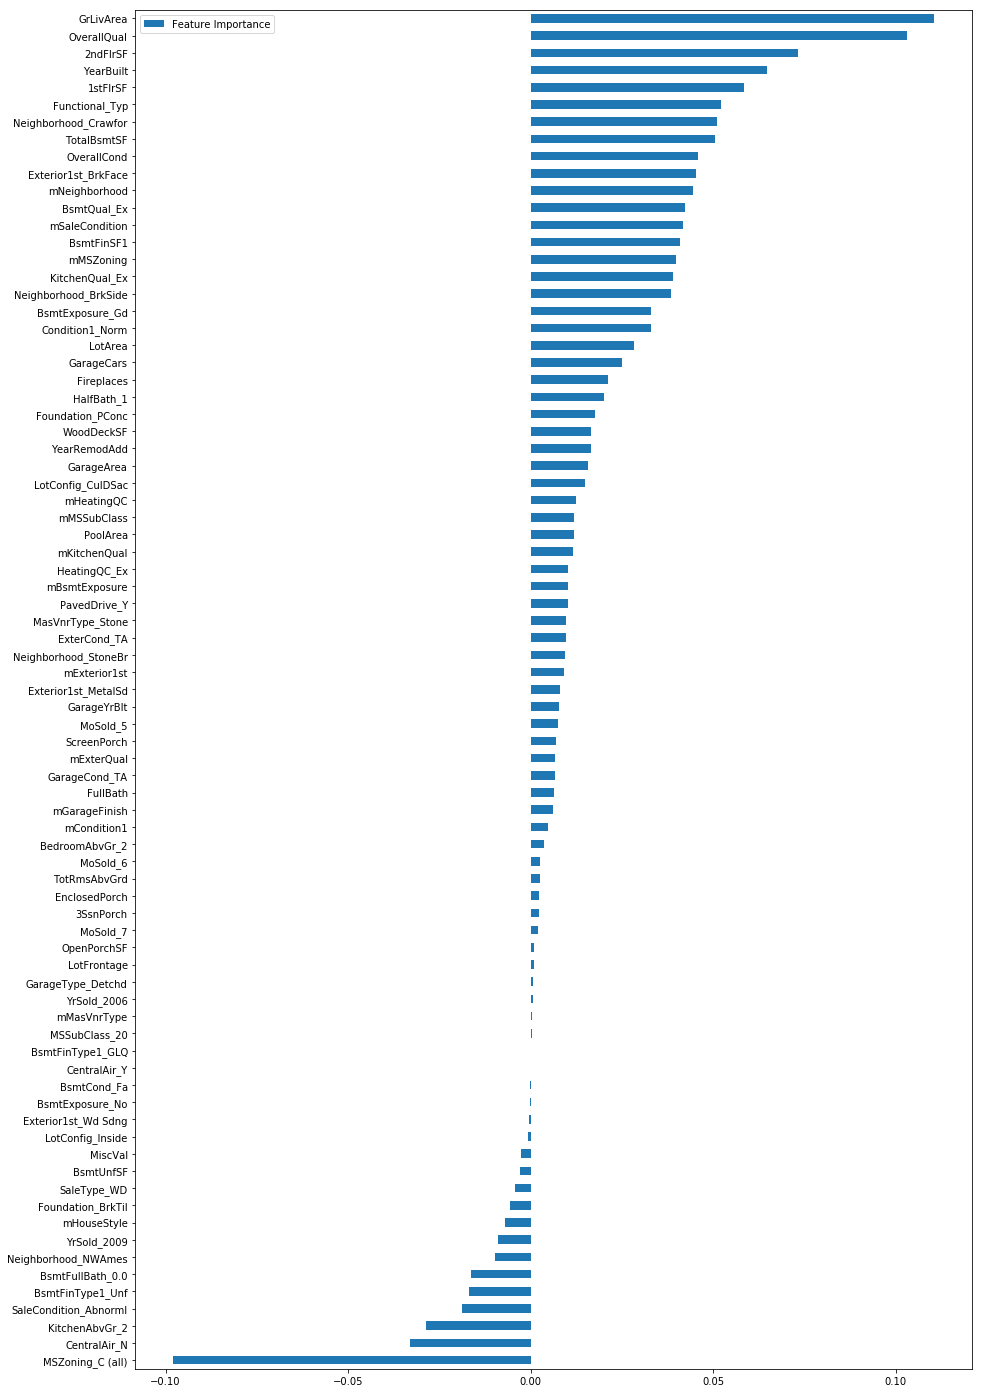

In [376]:
FI_lasso[FI_lasso['Feature Importance']!=0].sort_values("Feature Importance").plot(
kind = 'barh',figsize = (15,25))

In [377]:
FI_lasso.shape

(380, 1)

In [378]:
class add_feature(BaseEstimator, TransformerMixin):
    def __init__(self,additional=1):
        self.additional = additional
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        if self.additional==1:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
        else:
            X["TotalHouse"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"]   
            X["TotalArea"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"]
            
            X["+_TotalHouse_OverallQual"] = X["TotalHouse"] * X["OverallQual"]
            X["+_GrLivArea_OverallQual"] = X["GrLivArea"] * X["OverallQual"]
            X["+_mMSZoning_TotalHouse"] = X["mMSZoning"] * X["TotalHouse"]
            X["+_mMSZoning_OverallQual"] = X["mMSZoning"] + X["OverallQual"]
            X["+_mMSZoning_YearBuilt"] = X["mMSZoning"] + X["YearBuilt"]
            X["+_mNeighborhood_TotalHouse"] = X["mNeighborhood"] * X["TotalHouse"]
            X["+_mNeighborhood_OverallQual"] = X["mNeighborhood"] + X["OverallQual"]
            X["+_mNeighborhood_YearBuilt"] = X["mNeighborhood"] + X["YearBuilt"]
            X["+_BsmtFinSF1_OverallQual"] = X["BsmtFinSF1"] * X["OverallQual"]
            
            X["-_mFunctional_TotalHouse"] = X["mFunctional"] * X["TotalHouse"]
            X["-_mFunctional_OverallQual"] = X["mFunctional"] + X["OverallQual"]
            X["-_LotArea_OverallQual"] = X["LotArea"] * X["OverallQual"]
            X["-_TotalHouse_LotArea"] = X["TotalHouse"] + X["LotArea"]
            X["-_mCondition1_TotalHouse"] = X["mCondition1"] * X["TotalHouse"]
            X["-_mCondition1_OverallQual"] = X["mCondition1"] + X["OverallQual"]
            
           
            X["Bsmt"] = X["BsmtFinSF1"] + X["BsmtFinSF2"] + X["BsmtUnfSF"]
            X["Rooms"] = X["FullBath"]+X["TotRmsAbvGrd"]
            X["PorchArea"] = X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]
            X["TotalPlace"] = X["TotalBsmtSF"] + X["1stFlrSF"] + X["2ndFlrSF"] + X["GarageArea"] + X["OpenPorchSF"]+X["EnclosedPorch"]+X["3SsnPorch"]+X["ScreenPorch"]

    
            return X

In [379]:
pipe = Pipeline([
    ('labenc', LabelEnc()),
    ('add_feature', add_feature(additional=2)),
    ('skew_dummies', skew_dummies(skew=1)),
    ])

In [380]:
full_pipe = pipe.fit_transform(all_data)

In [381]:
n_train = train.shape[0]

X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y = SalePrice.SalePrice

X_scaled = scaler.fit(X).transform(X)
y_log = np.log1p(SalePrice.SalePrice)
test_X_scaled = scaler.transform(test_X)

In [382]:
#from sklearn.decomposition import PCA

In [383]:
#pca = PCA(n_components= 381)

In [384]:
#X_scaled = pca.fit_transform(X_scaled)
#test_X_scaled = pca.fit_transform(test_X_scaled)

n_train = train.shape[0]

X = all_data[:n_train]
test_X = all_data[n_train:]
y = SalePrice.SalePrice
y = np.log1p(y)

# Model Testing 

In [385]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV

In [386]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [387]:
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)


In [388]:
X = X_scaled

In [389]:
X

array([[ 0.11348458, -0.26613977,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.86875775,  0.03046678,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27742081,  0.39915972,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.16894364, -0.10873491,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.27742081,  0.05862636, -0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63377651,  0.11066973, -0.5       , ...,  0.        ,
         0.        ,  0.        ]])

In [390]:
y = y_log

In [391]:
y

0       12.247699
1       12.109016
2       12.317171
3       11.849405
4       12.429220
5       11.870607
6       12.634606
7       12.206078
8       11.774528
9       11.678448
10      11.771444
11      12.751303
12      11.877576
13      12.540761
14      11.964007
15      11.790565
16      11.911708
17      11.407576
18      11.976666
19      11.842236
20      12.692506
21      11.845110
22      12.345839
23      11.774528
24      11.944714
25      12.454108
26      11.811555
27      12.631344
28      12.242891
29      11.134604
          ...    
1430    12.165985
1431    11.875838
1432    11.074436
1433    12.136192
1434    11.982935
1435    12.066816
1436    11.699413
1437    12.885673
1438    11.916395
1439    12.190964
1440    12.160034
1441    11.913720
1442    12.644331
1443    11.703554
1444    12.098493
1445    11.767575
1446    11.969724
1447    12.388398
1448    11.626263
1449    11.429555
1450    11.820418
1451    12.567555
1452    11.884496
1453    11.344519
1454    12

In [392]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Linear Regression 

In [393]:
lm = LinearRegression()

In [394]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [395]:
predictions = lm.predict(X_test)

In [396]:
X_test.shape

(482, 401)

Text(0.5, 0, 'predictions')

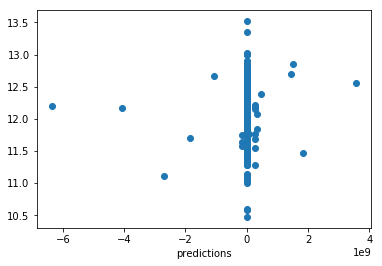

In [397]:
plt.scatter(predictions,y_test)
plt.xlabel("predictions")

In [398]:
max(predictions)

3570953019.4360356

In [399]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   58022980.4587769
MSE:   1.8747163589123283e+17
RMSE:   432979948.60181785


## Lasso Linear Regression

In [400]:
lasso_cv = LassoCV(alphas = [0.0001,0.0001,0.001,0.01,0.1,1,10] )

In [401]:
lasso_cv.fit(X_train,y_train)

LassoCV(alphas=[0.0001, 0.0001, 0.001, 0.01, 0.1, 1, 10], copy_X=True,
    cv='warn', eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=None, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [402]:
np.exp(predictions)

array([230342.13670246,  97987.21938873, 107294.07669797, 168375.39884525,
       325996.39112485, 146345.1293916 , 243676.16923706, 303158.10715216,
       281747.78398267, 141632.77686315, 160564.44575592, 199304.96522655,
       167527.13603781, 269552.12878488, 169118.24827116, 186011.27420241,
       191082.75828159, 129080.16873784, 140685.05819846, 218053.60463731,
       190522.31117576, 203406.53738549, 165706.18275366,             inf,
       189737.55053609, 157695.6853746 , 187839.19711127, 116021.40951614,
       183845.22918498, 158140.56474711, 137963.962853  , 112503.29414926,
       185234.84830706, 118414.47838563, 254491.30801637, 296171.60871806,
       135972.25891067, 201399.07969699, 112407.20202417, 113064.32084342,
       116715.68391188, 231607.39141661, 109913.92840224,  92451.65050747,
       128818.47662922, 160986.40249842, 104085.06054328, 129628.88248597,
       145177.46168348, 142710.94881735,             inf,  65817.1345298 ,
       101822.97827517, 1

In [403]:
lasso_cv.alpha_

0.001

In [404]:
lasso = Lasso(alpha = 0.001)

In [405]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [406]:
predictions = lasso.predict(X_test)

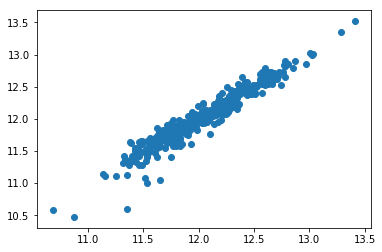

In [407]:
plt.scatter(predictions,y_test)

In [408]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.07511603637352364
MSE:   0.011731493829256218
RMSE:   0.10831202070525792


##  Ridge Linear Regression

In [409]:
ridge_cv = RidgeCV(alphas=[0.0001,0.001,0.01,0.1,1,10])

In [410]:
ridge_cv.fit(X_train,y_train)

RidgeCV(alphas=array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01]),
    cv=None, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [411]:
ridge_cv.alpha_

10.0

In [412]:
ridge = Ridge(alpha = 10)

In [413]:
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [414]:
predictions = ridge.predict(X_test)

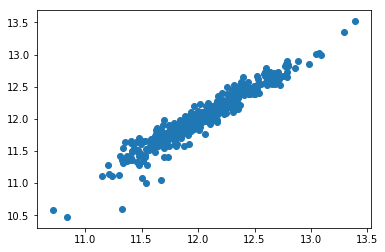

In [415]:
plt.scatter(predictions,y_test)

In [416]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.07634038623549606
MSE:   0.012087859034971843
RMSE:   0.1099447999451172


## ElasticNet Linear Regression 

In [417]:
ENet_cv = ElasticNetCV(alphas=[0.0001,0.001,0.01,0.1,1,10,100])

In [418]:
ENet_cv.fit(X_train,y_train)

ElasticNetCV(alphas=[0.0001, 0.001, 0.01, 0.1, 1, 10, 100], copy_X=True,
       cv='warn', eps=0.001, fit_intercept=True, l1_ratio=0.5,
       max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0)

In [419]:
ENet_cv.alpha_

0.001

In [420]:
ENet = ElasticNet(alpha = 0.001)

In [421]:
ENet.fit(X_train,y_train)

ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [422]:
predictions = ENet.predict(X_test)

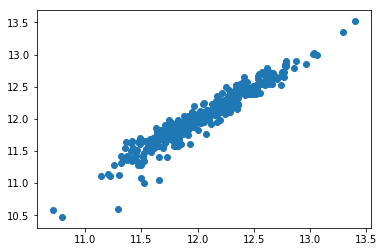

In [423]:
plt.scatter(predictions,y_test)

In [424]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.0740905280332685
MSE:   0.011318317320946965
RMSE:   0.10638758067061664


# Gradient Boosting

In [425]:
from sklearn.ensemble import GradientBoostingRegressor

In [426]:
gbr = GradientBoostingRegressor(n_estimators=1000)

In [427]:
gbr.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=1000, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [428]:
predictions = gbr.predict(X_test)

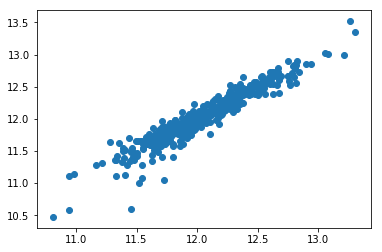

In [429]:
plt.scatter(predictions,y_test)

In [430]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.08283531199102227
MSE:   0.014335009934551349
RMSE:   0.1197289018347339


#  KernelRidge

In [431]:
from sklearn.kernel_ridge import KernelRidge

In [471]:
kr = KernelRidge(alpha = 0.001)

In [472]:
kr.fit(X_train,y_train)

KernelRidge(alpha=0.001, coef0=1, degree=3, gamma=None, kernel='linear',
      kernel_params=None)

In [473]:
predicitons = kr.predict(X_test)

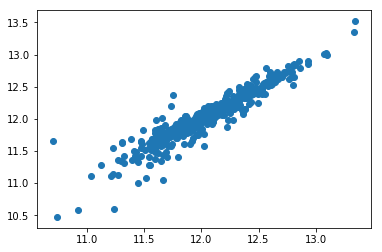

In [474]:
plt.scatter(predictions,y_test)

In [475]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.08721340576000054
MSE:   0.017626178169191157
RMSE:   0.13276361764124672


# SVR LINEARSVR 

In [439]:
from sklearn.svm import SVR, LinearSVR

In [440]:
svr = SVR()

In [442]:
Lsvr = LinearSVR()

In [443]:
svr.fit(X_train,y_train)
Lsvr.fit(X_train,y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
     intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
     random_state=None, tol=0.0001, verbose=0)

In [444]:
predictions = svr.predict(X_test)

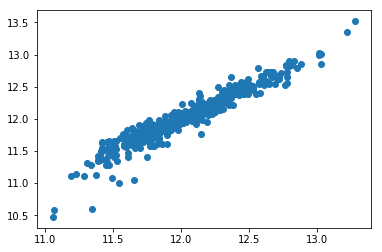

In [445]:
plt.scatter(predictions,y_test)

In [446]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.0776538211414673
MSE:   0.012959463216716687
RMSE:   0.11383963816139213


In [448]:
predictions = Lsvr.predict(X_test)

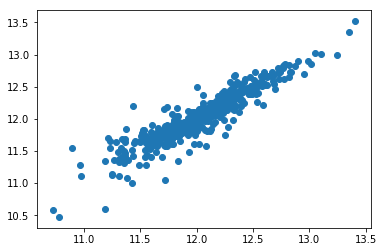

In [449]:
plt.scatter(predicitons,y_test)

In [450]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.08721340576000054
MSE:   0.017626178169191157
RMSE:   0.13276361764124672


# Random Forest 

In [351]:
from sklearn.ensemble import RandomForestRegressor

In [352]:
rfr = RandomForestRegressor(n_estimators = 1000)

In [353]:
n_train = train.shape[0]

X = full_pipe[:n_train]
test_X = full_pipe[n_train:]
y = np.log(SalePrice.SalePrice)


In [354]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [355]:
rfr.fit(X_train,(y_train*1000000).astype(int))

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [356]:
predictions = rfr.predict(X_test)

In [357]:
predictions = predictions/1000000

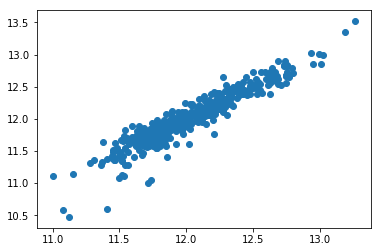

In [358]:
plt.scatter(predictions,y_test)

In [359]:
print('MAE:  ',mean_absolute_error(y_test,predictions))
print('MSE:  ',mean_squared_error(y_test,predictions))
print('RMSE:  ',np.sqrt(mean_squared_error(y_test,predictions)))

MAE:   0.09029970721653797
MSE:   0.017524616749174805
RMSE:   0.13238057542243425


# Test data 

In [120]:
X_train = X_scaled
y_train = y_log

In [121]:
X_test = test_X_scaled


In [122]:
X_test.shape

(1459, 401)

In [123]:
ridge.fit(X_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [124]:
predictions = ridge.predict(X_test)

In [125]:
Submissions = np.exp(predictions)

In [126]:
Submission3 = pd.concat((pd.DataFrame({'Id':test['Id']})
        ,pd.DataFrame({'SalePrice':Submissions})),axis= 1)

KeyError: 'Id'

In [ ]:
#Submission3.to_csv('Submission3.csv',index = False)

In [128]:
Submission2 = pd.read_csv('Submission2.csv')

In [129]:
Submission2

,Id,SalePrice
0,1461,115998.297165
1,1462,153395.646186
2,1463,184097.127142
3,1464,198214.938436
4,1465,205029.251769
5,1466,168836.329977
6,1467,186438.336770
7,1468,161194.617475
8,1469,198839.814015
9,1470,115881.515544


In [ ]:
plt.scatter(Submission3['SalePrice'],Submission2['SalePrice'])

In [ ]:

pd.set_option('display.max_columns', None)
test[test['Id'] == 2550]


In [ ]:
test[test['Id'] == 1461]